## The reader for data from beamtime ##

In [192]:
import os
import pandas as pd

def search_files_by_keyword(directory, keywords, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    
      
    # Search for the keyword in each file name
    matching_files = [file #return file
                      for file in file_names # listing files in directory
                      if all(keyword in file for keyword in keywords) and file.endswith(file_format)# searching for all keywords
                      # ключевое слово ищется в каждом файле из списка, прежде чем перейти к новому файлу в имени этого проверяются все ключевые слова
                    # keyword is searched for in each file in the list, all keywords are checked in the name of this file before moving to a new file
                     ] 

    return matching_files

#directory_path = "D:\clay\clay_ben_01\integrated\waxs"
directory_path = "D:\clay\clay_ill_vap_cool_03\integrated\waxs"
#directory_path = 'D:\2022-07-08_to_2022-07-11_ESRF_ID02\sorted'
#directory_path = 'D:\ESRF\sorted'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.data'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg' '.opju'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
    # Gathering all file names into a single list
    all_file_names = matching_files
    print("\nAll file names in a single list:")
    #print(all_file_names)    
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")
    


Files containing the keyword '['clay']' with format '.data':
clay_ill_vap_cool_03_E000001_000001.data
clay_ill_vap_cool_03_E000001_000002.data
clay_ill_vap_cool_03_E000001_000003.data
clay_ill_vap_cool_03_E000001_000004.data
clay_ill_vap_cool_03_E000001_000005.data
clay_ill_vap_cool_03_E000001_000006.data
clay_ill_vap_cool_03_E000001_000007.data
clay_ill_vap_cool_03_E000001_000008.data
clay_ill_vap_cool_03_E000001_000009.data
clay_ill_vap_cool_03_E000001_000010.data
clay_ill_vap_cool_03_E000001_000011.data
clay_ill_vap_cool_03_E000001_000012.data
clay_ill_vap_cool_03_E000001_000013.data
clay_ill_vap_cool_03_E000001_000014.data
clay_ill_vap_cool_03_E000001_000015.data
clay_ill_vap_cool_03_E000001_000016.data
clay_ill_vap_cool_03_E000001_000017.data
clay_ill_vap_cool_03_E000001_000018.data
clay_ill_vap_cool_03_E000001_000019.data
clay_ill_vap_cool_03_E000001_000020.data
clay_ill_vap_cool_03_E000001_000021.data
clay_ill_vap_cool_03_E000001_000022.data
clay_ill_vap_cool_03_E000001_000023.d

## Loading of dictionary with all tables from set ##

In [ ]:
print(len(all_file_names))

In [193]:
def read_files_and_create_tables(file_names):
    # Dictionary to store tables with file names as keys
    tables = {}

    for file_name in file_names:
        try:
            # Assuming the files are in CSV format, adjust as needed
            #table = pd.read_csv(f'D:\clay\clay_ben_01\integrated\waxs\{file_name}', delimiter = ' ', header=None, skiprows=23)
            table = pd.read_csv(f'D:\clay\clay_ill_vap_cool_03\integrated\waxs\{file_name}', delimiter = ' ', header=None, skiprows=23)
            #file_path = f'D:\clay\clay_ben_01\integrated\waxs\{file}'
            # Use the file name (without extension) as the key for the table
            key = file_name.rsplit('.', 1)[0]
            
            # Add the table to the dictionary
            tables[key] = table
        except Exception as e:
            print(f"Error reading file '{file_name}': {e}")

    return tables


# Call the function to read files and create tables
resulting_tables = read_files_and_create_tables(all_file_names)

# Now 'resulting_tables' is a dictionary where keys are file names and values are Pandas DataFrames containing the data from each file
# You can further manipulate or analyze the data in each table as needed
for key, table in resulting_tables.items():
    print(f"Table for file '{key}':")
    print(table)
    #print(tb.head(5))
    print("\n")
   

Table for file 'clay_ill_vap_cool_03_E000001_000001':
       0   1         2   3   4   5         6   7   8         9
0    NaN NaN   9.65633 NaN NaN NaN  0.016230 NaN NaN  0.000036
1    NaN NaN   9.66899 NaN NaN NaN  0.015843 NaN NaN  0.000044
2    NaN NaN   9.68165 NaN NaN NaN  0.015457 NaN NaN  0.000043
3    NaN NaN   9.69431 NaN NaN NaN  0.015206 NaN NaN  0.000042
4    NaN NaN   9.70697 NaN NaN NaN  0.014925 NaN NaN  0.000042
5    NaN NaN   9.71963 NaN NaN NaN  0.014638 NaN NaN  0.000042
6    NaN NaN   9.73229 NaN NaN NaN  0.014320 NaN NaN  0.000041
7    NaN NaN   9.74495 NaN NaN NaN  0.013987 NaN NaN  0.000040
8    NaN NaN   9.75761 NaN NaN NaN  0.013693 NaN NaN  0.000040
9    NaN NaN   9.77027 NaN NaN NaN  0.013462 NaN NaN  0.000040
10   NaN NaN   9.78293 NaN NaN NaN  0.013216 NaN NaN  0.000039
11   NaN NaN   9.79559 NaN NaN NaN  0.012991 NaN NaN  0.000038
12   NaN NaN   9.80825 NaN NaN NaN  0.012824 NaN NaN  0.000038
13   NaN NaN   9.82091 NaN NaN NaN  0.012659 NaN NaN  0.000038
1

In [194]:
for key, table in resulting_tables.items():
    table.columns #The column labels of the DataFrame.

## Plot all curves from set ##

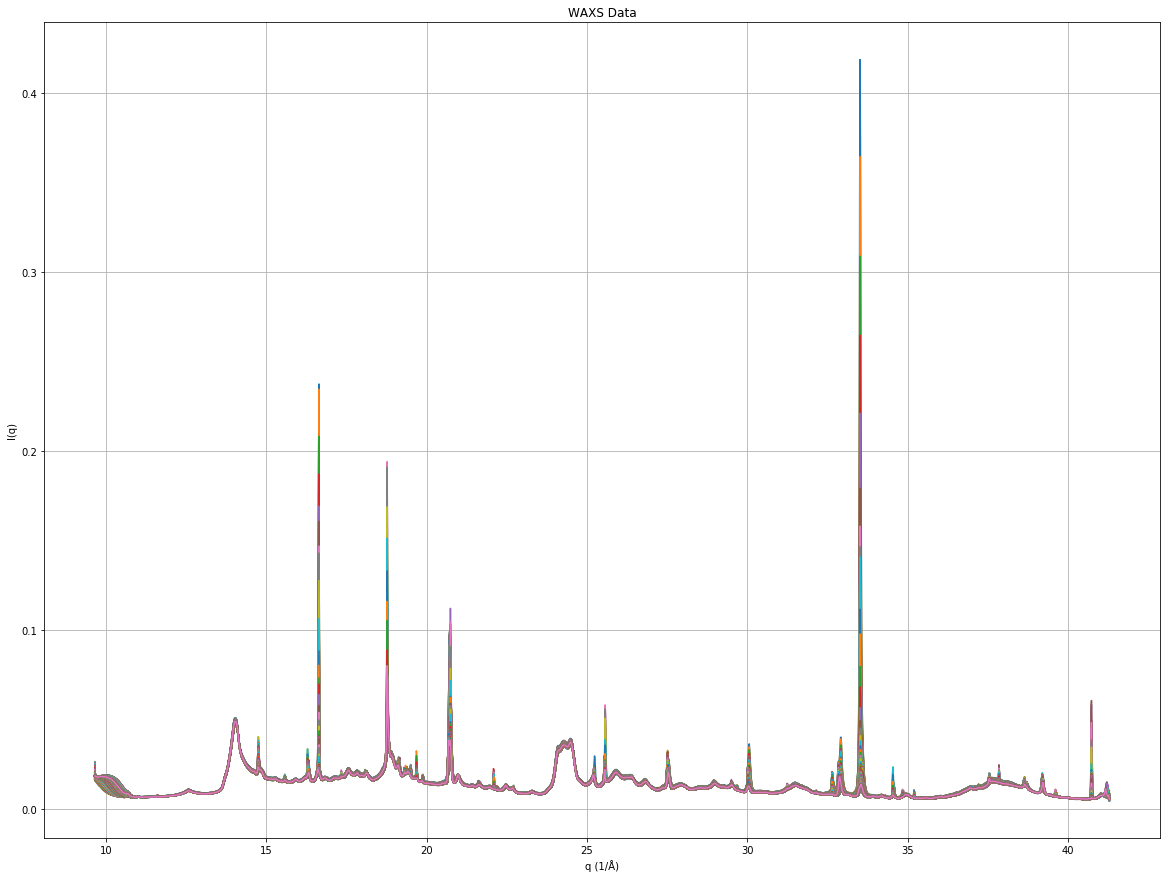

In [195]:
import numpy as np
import matplotlib.pyplot as plt


def read_waxs_dat(file_path):
    data = np.loadtxt(file_path, skiprows=23)  # Assuming a simple text file with numerical data
    q, intensity = data[:, 0], data[:, 1]
    intensity = intensity
    return q, intensity


def plot_waxs_data(q, intensity):
    plt.plot(q, intensity, label=f'{key}')

plt.figure(figsize=(20, 15))  # Adjust the figure size as needed    

    
for file in all_file_names:
    file_path = f'D:\clay\clay_ill_vap_cool_03\integrated\waxs\{file}'  # Replace with your file path
    #file_path = f'D:\clay\clay_ben_01\integrated\waxs\{file}'
    q, intensity = read_waxs_dat(file_path)
    plot_waxs_data(q, intensity)
    
    
plt.xlabel('q (1/Å)')
plt.ylabel('I(q)')
plt.title('WAXS Data')
plt.grid()
#plt.legend()
#plt.xscale('log')
#plt.xlim(0.75, 1) # Set X-axis limits to the range from 0.5 to 1
#plt.ylim(0, 1.75) # Set X-axis limits to the range from 0.5 to 2
plt.savefig(f'{search_keyword[0]}.png')
plt.show()

In [201]:
temp=[]
for file in all_file_names:
    parts = file.split('_')
    desired_part = parts[-1]
    numeric_part =desired_part.lstrip('0')
    numeric_part =int(numeric_part.strip('.data'))
    temp.append(numeric_part)

print(len(temp))

417


In [205]:
#temp1 = np.arange(20,-71,-0.41)
temp1 = np.arange(20,-71,-0.436)
temp2 = temp1[::-1]

tempit = np.hstack((temp1, temp2))
temp_names = tempit[:-1]
temp_names = [round(name) for name in temp_names]
print(len(temp_names))


417


In [203]:

from mpl_toolkits.mplot3d import Axes3D

def read_waxs_dat(file_path):
    data = np.loadtxt(file_path, skiprows=23)  # Assuming a simple text file with numerical data
    q, intensity = data[:, 0], data[:, 1]
    return q, intensity

# Create empty lists to store data from all files
all_q = []
all_intensity = []

# Iterate through all files
for file in all_file_names:
    file_path = f'D:\clay\clay_ill_vap_cool_03\integrated\waxs\{file}'  # Replace with your file path
    #file_path = f'D:\clay\clay_ben_01\integrated\waxs\{file}'
    q, intensity = read_waxs_dat(file_path)
    all_q.append(q)
    all_intensity.append(intensity)
    


# Convert lists to numpy arrays
all_q = np.array(all_q)
all_intensity = np.array(all_intensity)

for row_index, row in enumerate(all_intensity): #this cleans data from extremely high values
    for col_index, value in enumerate(row):
        if value > 0.25 and col_index > 0:
            all_intensity[row_index][col_index] = all_intensity[row_index][col_index - 1]

print(all_q.shape, np.max(all_intensity), np.mean(all_intensity))
# Create meshgrid
q_indices, temperature = np.meshgrid(all_q[1], temp)

#Create 3D plot


(417, 2500) 0.2376962 0.01341680920155587


In [199]:
print(len(all_q[0]))

2500


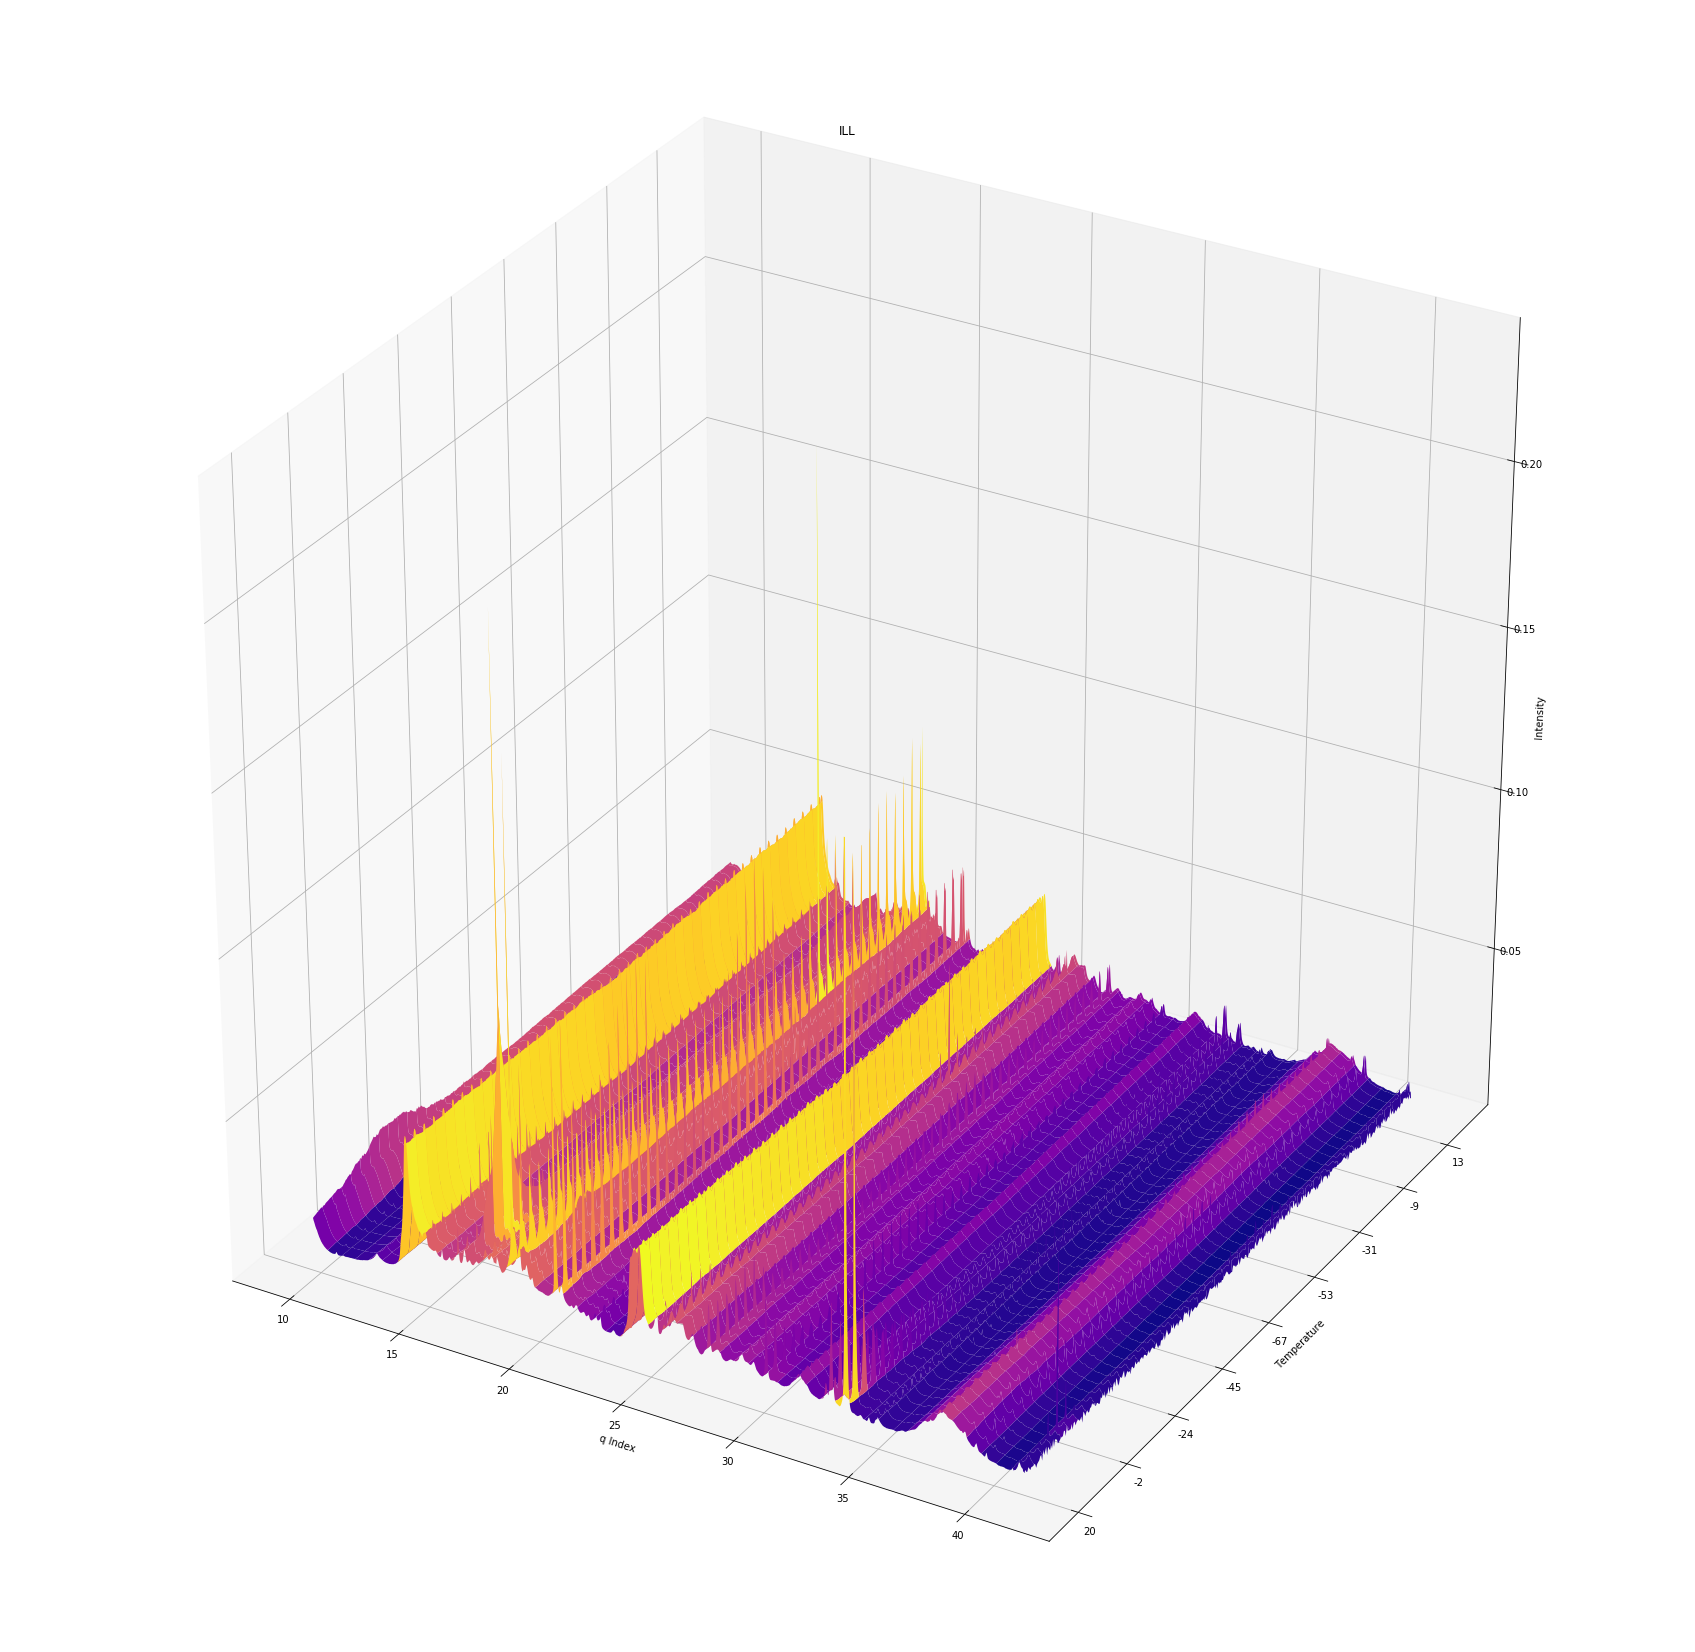

In [206]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(q_indices, temperature, all_intensity, cmap='plasma')
ax.set_xlabel('q Index')
ax.set_ylabel('Temperature')
ax.set_zlabel('Intensity')
ax.set_yticks(np.arange(0, len(temp), step=50))
ax.set_yticklabels(temp_names[::50])
ax.set_title('ILL')
plt.savefig(f'{search_keyword[0]}-3D.png')
plt.show()


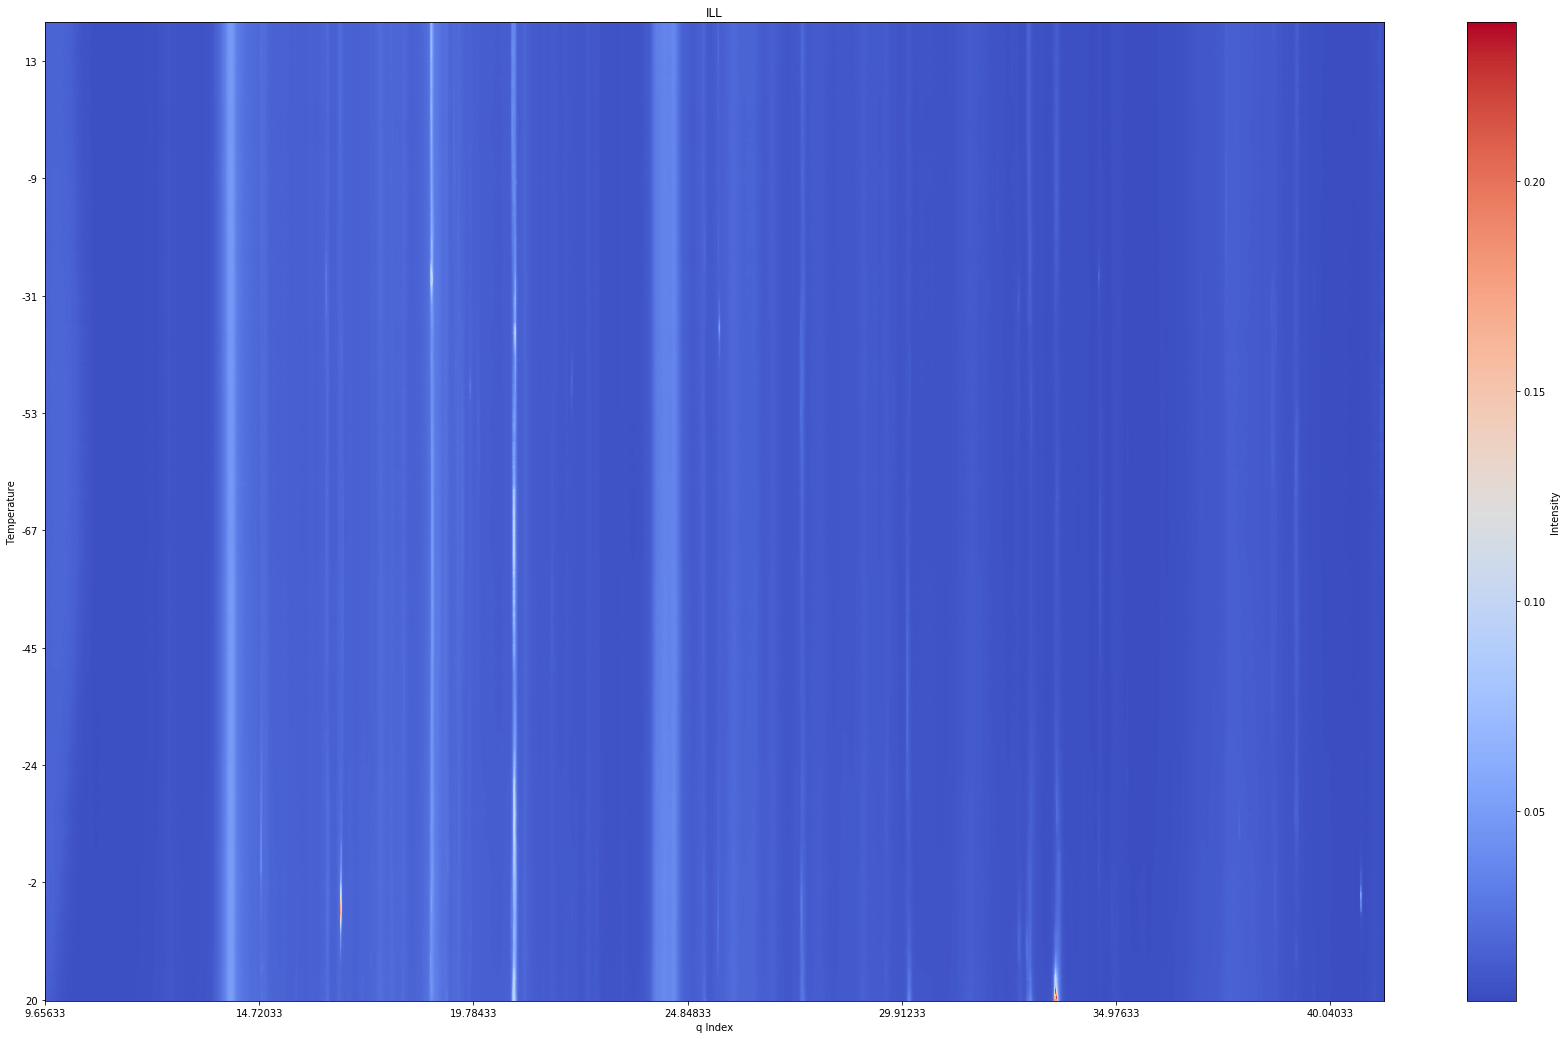

In [207]:
plt.figure(figsize=(30, 18))
plt.imshow(all_intensity, aspect='auto', cmap='coolwarm', origin='lower', )
plt.colorbar(label='Intensity')
num_q_values = len(all_q[0])
#plt.xticks(np.arange(num_q_values), all_q[1])
plt.xticks(np.arange(0, num_q_values, step=400), all_q[1][::400])
plt.yticks(np.arange(0, len(temp), step=50), temp_names[::50])
plt.xlabel('q Index')
plt.ylabel('Temperature')
plt.title('ILL')
plt.savefig(f'{search_keyword[0]}-2d.png')
plt.show()


### SAXS ###

In [210]:
directory_path = "D:\clay\clay_ill_vap_cool_03\integrated\saxs"
#directory_path = 'D:\2022-07-08_to_2022-07-11_ESRF_ID02\sorted'
#directory_path = 'D:\ESRF\sorted'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.data'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg' '.opju'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
    # Gathering all file names into a single list
    all_file_names = matching_files
    print("\nAll file names in a single list:")
    #print(all_file_names)    
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")

Files containing the keyword '['clay']' with format '.data':
clay_ill_vap_cool_03_E000001_000001.data
clay_ill_vap_cool_03_E000001_000002.data
clay_ill_vap_cool_03_E000001_000003.data
clay_ill_vap_cool_03_E000001_000004.data
clay_ill_vap_cool_03_E000001_000005.data
clay_ill_vap_cool_03_E000001_000006.data
clay_ill_vap_cool_03_E000001_000007.data
clay_ill_vap_cool_03_E000001_000008.data
clay_ill_vap_cool_03_E000001_000009.data
clay_ill_vap_cool_03_E000001_000010.data
clay_ill_vap_cool_03_E000001_000011.data
clay_ill_vap_cool_03_E000001_000012.data
clay_ill_vap_cool_03_E000001_000013.data
clay_ill_vap_cool_03_E000001_000014.data
clay_ill_vap_cool_03_E000001_000015.data
clay_ill_vap_cool_03_E000001_000016.data
clay_ill_vap_cool_03_E000001_000017.data
clay_ill_vap_cool_03_E000001_000018.data
clay_ill_vap_cool_03_E000001_000019.data
clay_ill_vap_cool_03_E000001_000020.data
clay_ill_vap_cool_03_E000001_000021.data
clay_ill_vap_cool_03_E000001_000022.data
clay_ill_vap_cool_03_E000001_000023.d

In [211]:
def read_files_and_create_tables(file_names):
    # Dictionary to store tables with file names as keys
    tables = {}

    for file_name in file_names:
        try:
            # Assuming the files are in CSV format, adjust as needed
            #table = pd.read_csv(f'D:\clay\clay_ben_01\integrated\waxs\{file_name}', delimiter = ' ', header=None, skiprows=23)
            table = pd.read_csv(f'D:\clay\clay_ill_vap_cool_03\integrated\saxs\{file_name}', delimiter = ' ', header=None, skiprows=23)
            #file_path = f'D:\clay\clay_ben_01\integrated\waxs\{file}'
            # Use the file name (without extension) as the key for the table
            key = file_name.rsplit('.', 1)[0]
            
            # Add the table to the dictionary
            tables[key] = table
        except Exception as e:
            print(f"Error reading file '{file_name}': {e}")

    return tables


# Call the function to read files and create tables
resulting_tables = read_files_and_create_tables(all_file_names)

# Now 'resulting_tables' is a dictionary where keys are file names and values are Pandas DataFrames containing the data from each file
# You can further manipulate or analyze the data in each table as needed
for key, table in resulting_tables.items():
    print(f"Table for file '{key}':")
    print(table)
    #print(tb.head(5))
    print("\n")
   

Table for file 'clay_ill_vap_cool_03_E000001_000001':
       0   1         2   3   4   5         6   7   8         9
0    NaN NaN  0.001333 NaN NaN NaN  0.000000 NaN NaN  0.000000
1    NaN NaN  0.004000 NaN NaN NaN  0.000000 NaN NaN  0.000000
2    NaN NaN  0.006667 NaN NaN NaN  0.000000 NaN NaN  0.000000
3    NaN NaN  0.009333 NaN NaN NaN  0.000000 NaN NaN  0.000000
4    NaN NaN  0.012000 NaN NaN NaN  0.000000 NaN NaN  0.000000
5    NaN NaN  0.014667 NaN NaN NaN  0.000000 NaN NaN  0.000000
6    NaN NaN  0.017333 NaN NaN NaN  0.000000 NaN NaN  0.000000
7    NaN NaN  0.020000 NaN NaN NaN  0.000000 NaN NaN  0.000000
8    NaN NaN  0.022667 NaN NaN NaN  0.000000 NaN NaN  0.000000
9    NaN NaN  0.025333 NaN NaN NaN  0.000000 NaN NaN  0.000000
10   NaN NaN  0.028000 NaN NaN NaN  0.000000 NaN NaN  0.000000
11   NaN NaN  0.030667 NaN NaN NaN  0.000000 NaN NaN  0.000000
12   NaN NaN  0.033333 NaN NaN NaN  0.000000 NaN NaN  0.000000
13   NaN NaN  0.036000 NaN NaN NaN  0.000000 NaN NaN  0.000000
1

In [238]:
def read_waxs_dat(file_path):
    data = np.loadtxt(file_path, skiprows=23)  # Assuming a simple text file with numerical data
    q, intensity = data[:, 0], data[:, 1]
    return q, intensity

# Create empty lists to store data from all files
all_q = []
all_intensity = []

# Iterate through all files
for file in all_file_names:
    file_path = f'D:\clay\clay_ill_vap_cool_03\integrated\saxs\{file}'  # Replace with your file path
    #file_path = f'D:\clay\clay_ben_01\integrated\waxs\{file}'
    q, intensity = read_waxs_dat(file_path)
    all_q.append(q)
    all_intensity.append(intensity)
    


# Convert lists to numpy arrays
all_q = np.array(all_q)
all_intensity = np.array(all_intensity)

for row_index, row in enumerate(all_intensity): #this cleans data from 0
    for col_index, value in enumerate(row):
        if value == 0 and col_index > 0:
            all_intensity[row_index][col_index] = np.min(all_intensity)

all_intensity = np.log(all_intensity)

# for row_index, row in enumerate(all_intensity): #this cleans data from extremely high values
#     for col_index, value in enumerate(row):
#         if value > 0.25 and col_index > 0:
#             all_intensity[row_index][col_index] = all_intensity[row_index][col_index - 1]

print(all_q.shape, np.max(all_intensity), np.mean(all_intensity))
# Create meshgrid
q_indices, temperature = np.meshgrid(all_q[1], temp)

#Create 3D plot


(417, 1500) 3.1988331047520466 -inf


C:\Programfiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


C:\Programfiles\Anaconda3\lib\site-packages\matplotlib\colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Programfiles\Anaconda3\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Programfiles\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


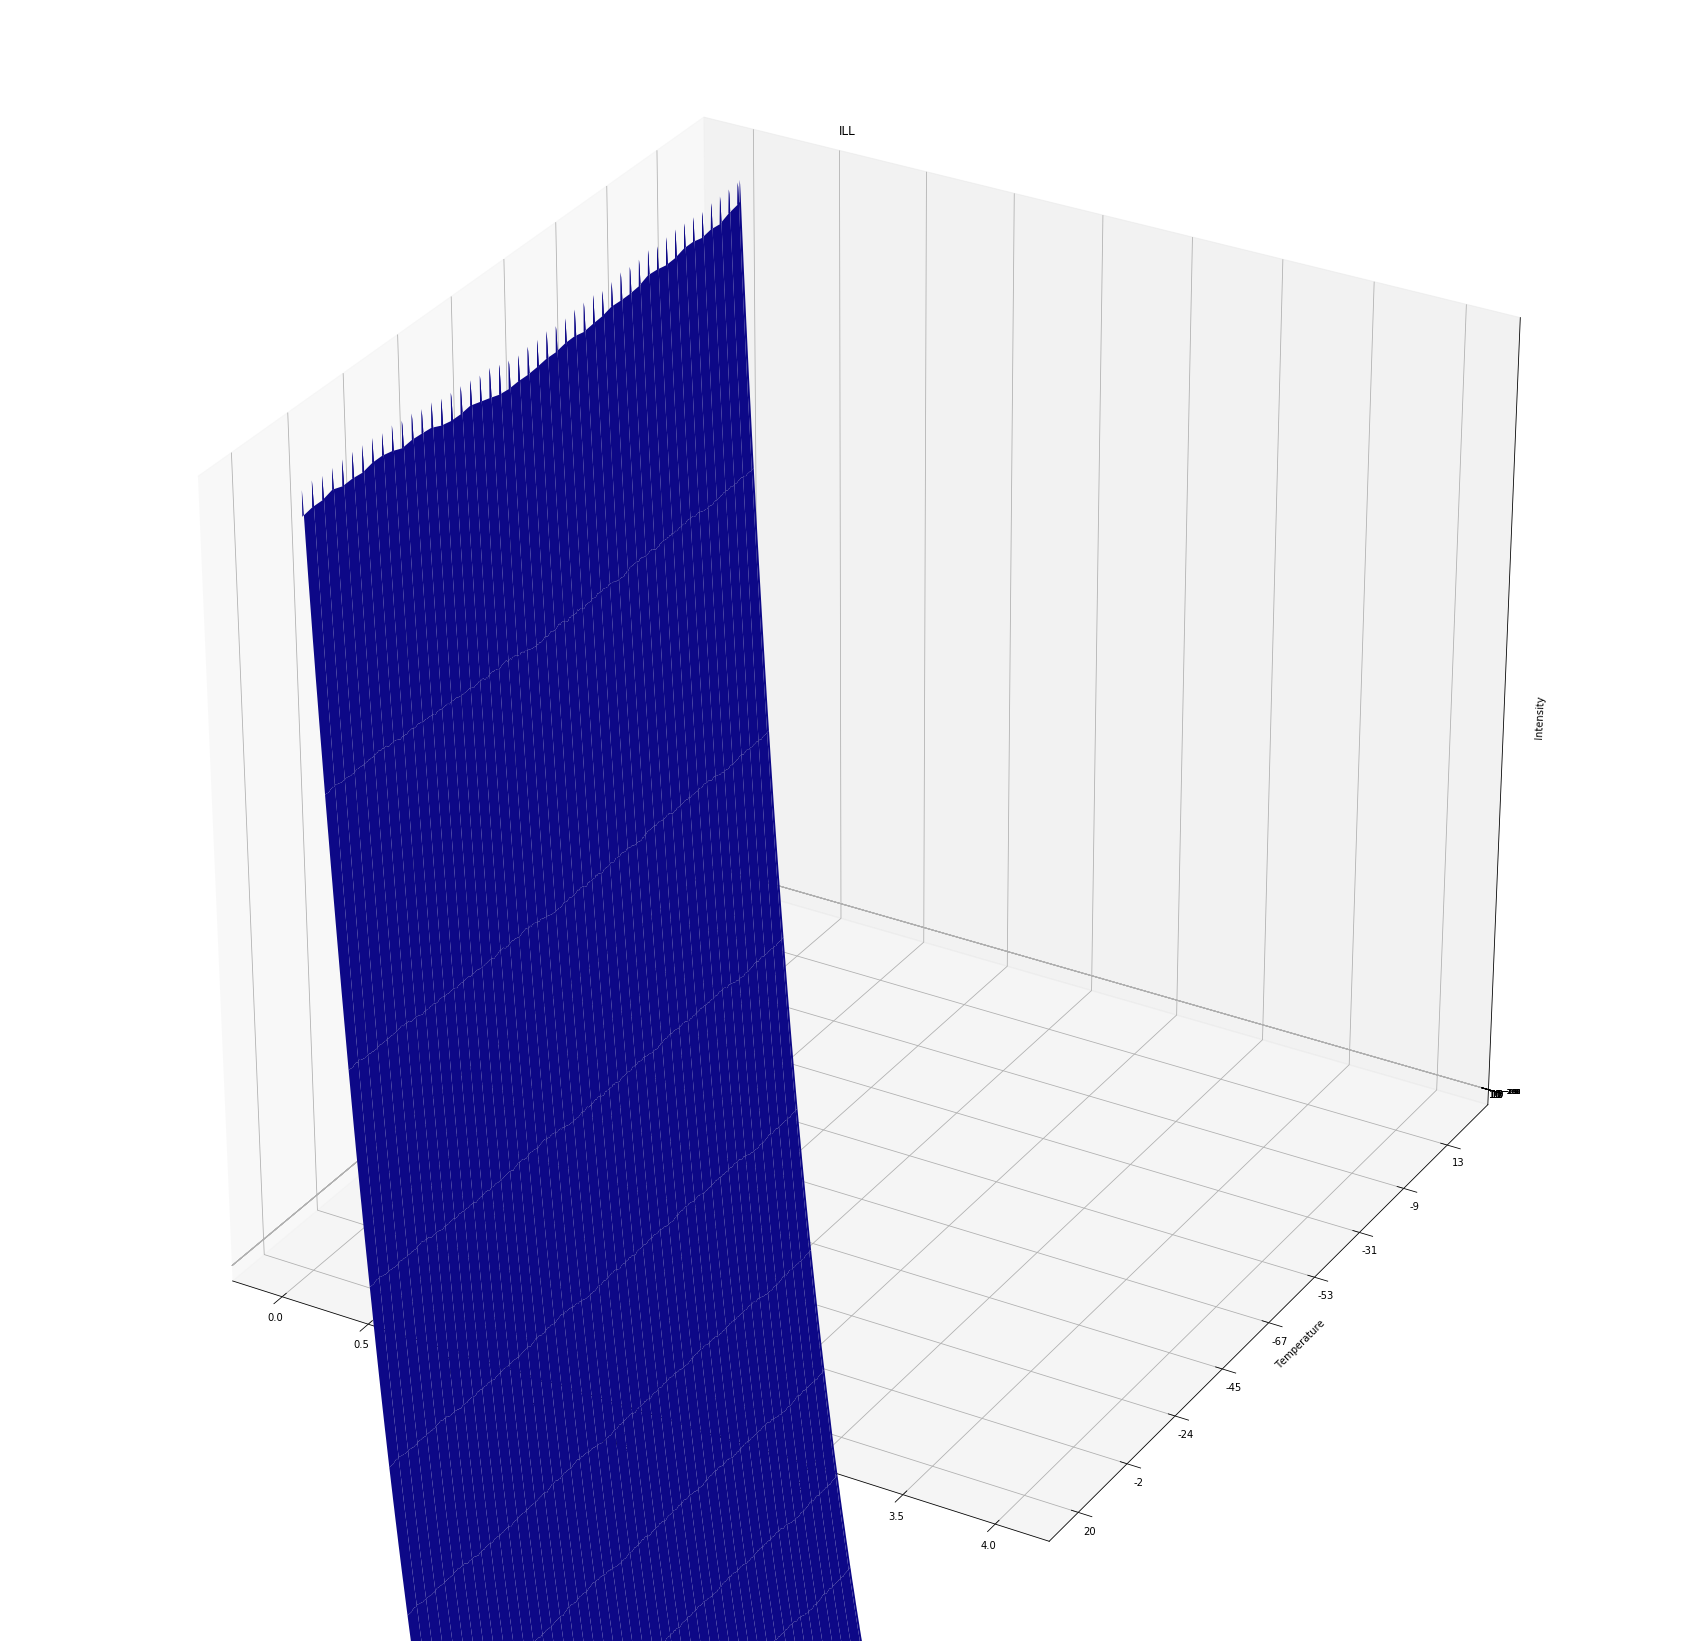

In [237]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(q_indices, temperature, all_intensity, cmap='plasma')
ax.set_xlabel('q Index')
ax.set_ylabel('Temperature')
ax.set_zlabel('Intensity')
ax.set_yticks(np.arange(0, len(temp), step=50))
ax.set_yticklabels(temp_names[::50])
ax.set_zscale('log')
ax.set_title('ILL')
plt.savefig(f'{search_keyword[0]}-3D.png')
plt.show()

C:\Programfiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


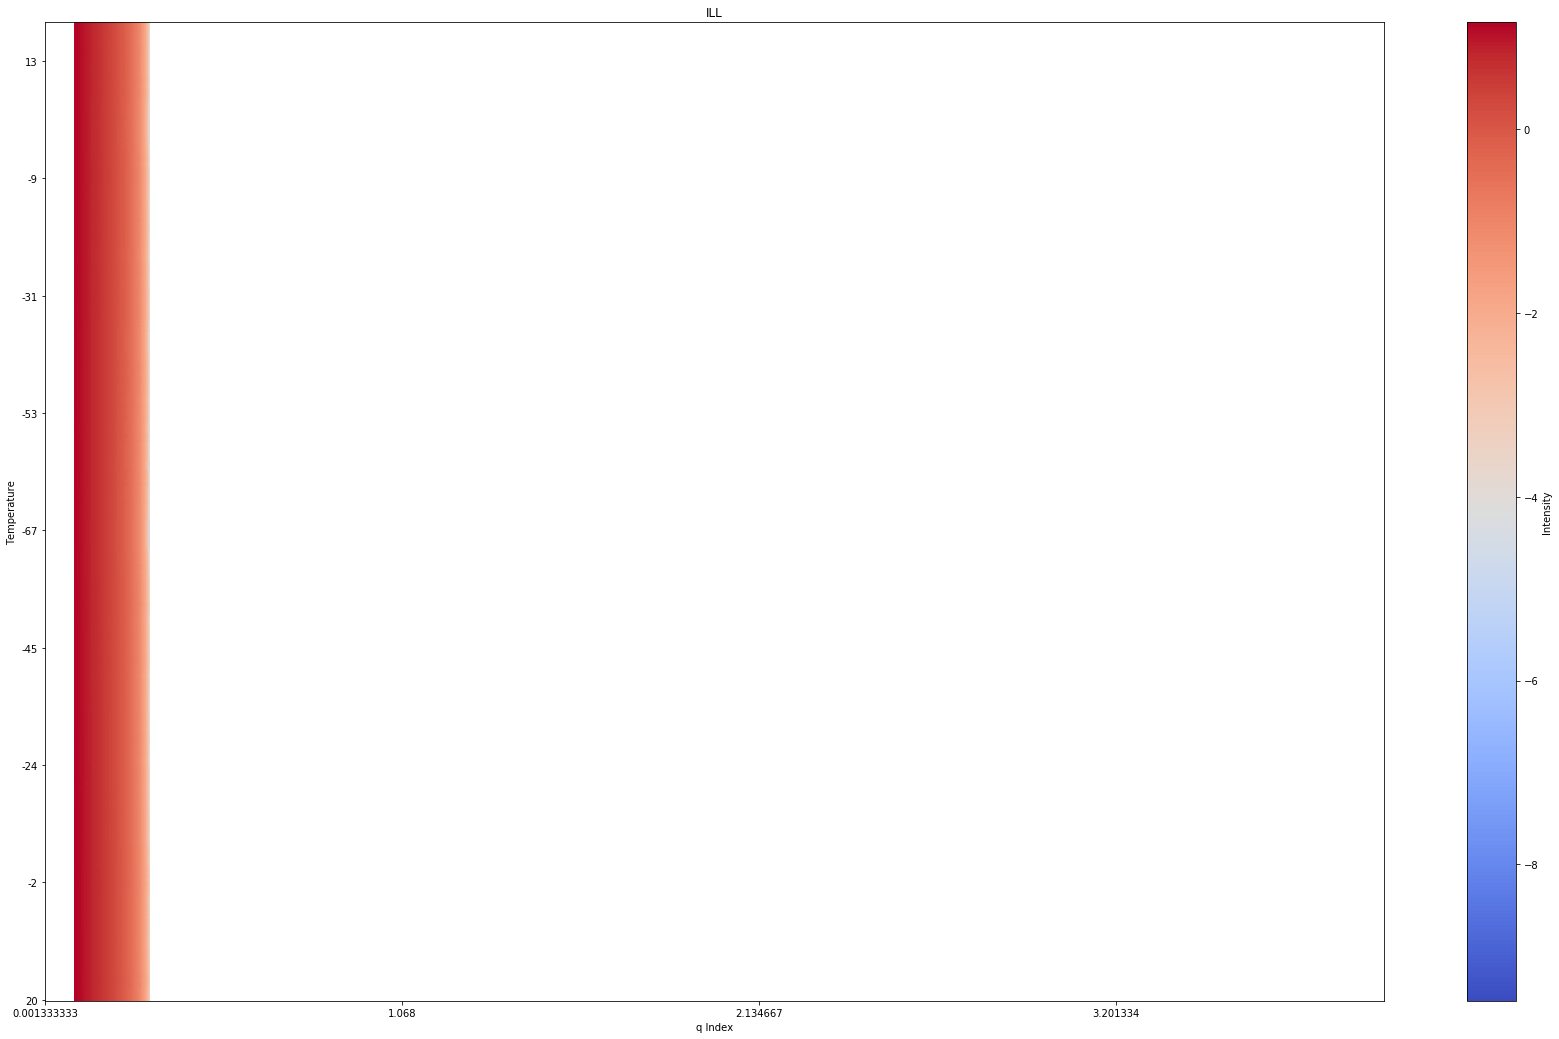

In [233]:
plt.figure(figsize=(30, 18))
plt.imshow(np.log(all_intensity), aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Intensity')
num_q_values = len(all_q[0])
#plt.xticks(np.arange(num_q_values), all_q[1])
plt.xticks(np.arange(0, num_q_values, step=400), all_q[1][::400])
plt.yticks(np.arange(0, len(temp), step=50), temp_names[::50])
plt.xlabel('q Index')
plt.ylabel('Temperature')
plt.title('ILL')
plt.savefig(f'{search_keyword[0]}-2d.png')
plt.show()